In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.datasets import mnist

In [2]:
encoding_dim=32

In [3]:
input_dim=keras.Input(shape=(784,))

In [4]:
encoded=layers.Dense(encoding_dim,activation='relu')(input_dim)

In [5]:
decoded=layers.Dense(784,activation='sigmoid')(encoded)

In [6]:
autoencoder=keras.Model(input_dim,decoded)

In [7]:
encoder=keras.Model(input_dim,encoded)

In [8]:
encoded_input=keras.Input(shape=(encoding_dim,))

In [9]:
decoder_layer=autoencoder.layers[-1]

In [10]:
decoder=keras.Model(encoded_input,decoder_layer(encoded_input))

In [11]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [12]:
(xtrain,_),(xtest,_)=mnist.load_data()

In [13]:
xtrain=xtrain.astype('float32')/255
xtest=xtest.astype('float32')/255

In [14]:
xtrain.shape

(60000, 28, 28)

In [15]:
xtest.shape

(10000, 28, 28)

In [16]:
xtrain=xtrain.reshape((len(xtrain),np.prod(xtrain.shape[1:])))
xtrain.shape

(60000, 784)

In [17]:
xtest=xtest.reshape((len(xtest),np.prod(xtest.shape[1:])))
xtest.shape

(10000, 784)

In [18]:
autoencoder.fit(xtrain,xtrain,epochs=50,batch_size=256,validation_data=(xtest,xtest))

Epoch 1/50
235/235 [==============================] - 6s 23ms/step - loss: 0.2787 - val_loss: 0.1898
Epoch 2/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1695 - val_loss: 0.1527
Epoch 3/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1436 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1280 - val_loss: 0.1206
Epoch 5/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1174 - val_loss: 0.1120
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1100 - val_loss: 0.1059
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1050 - val_loss: 0.1018
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1014 - val_loss: 0.0988
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0990 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0972 - val_los

In [19]:
encoded_img=encoder.predict(xtest)

313/313 [==============================] - 0s 1ms/step


In [20]:
decoded_img=decoder.predict(encoded_img)

313/313 [==============================] - 0s 1ms/step


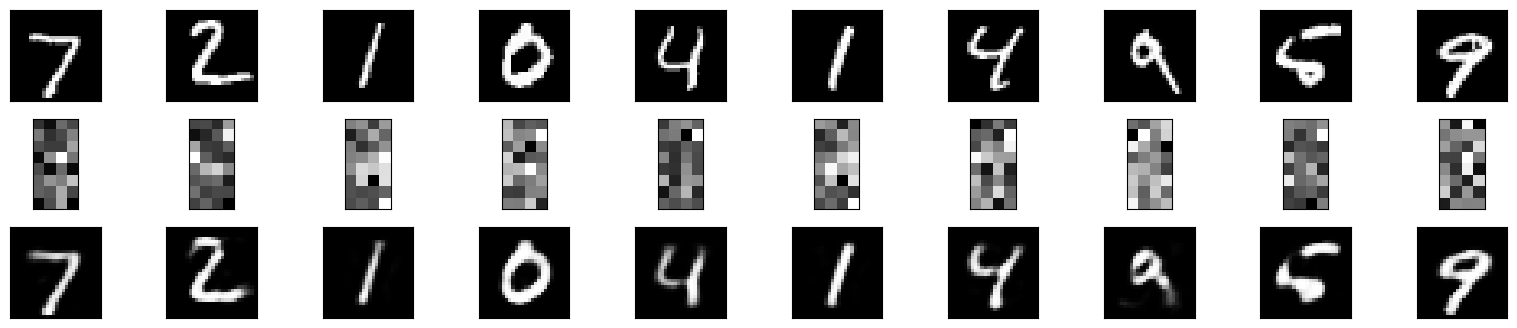

In [21]:
n=10
plt.figure(figsize=(40,4))
for i in range(10):
    ax=plt.subplot(3,20,i+1)
    plt.imshow(xtest[i].reshape(28,28,))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(3,20,i+1+20)
    plt.imshow(encoded_img[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(3,20,2*20+i+1)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)